# Salario mínimo real en Costa Rica 2010 - 2024
El objetivo de este proyecto es medir, cómo y cuanto el poder adquisitivo con un salario mínimo se ha visto afectado, o beneficiado, es decir, cual es el salario real comparado con el salario minimo nominal en 2010


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ipc = pd.read_excel(r"C:\Users\jaria\Desktop\IPC_MUNDIAL_2010_100_DATA.xlsx", header=3)

In [3]:
costa_rica_ipc = ipc[ipc["Country Name"] == "Costa Rica"]
def check(column_name):
    try:
        int(column_name)
        return int(column_name)
    except:
        return 0
    
valid = [column for column in costa_rica_ipc.columns if check(column) >= 2010]
costa_rica_ipc_prefixed = costa_rica_ipc[valid]
columns = costa_rica_ipc_prefixed.columns
values = [costa_rica_ipc_prefixed[f"{column}"].iloc[0] for column in columns]
ipc_fixed = pd.DataFrame({"Year": columns, "IPC": values})

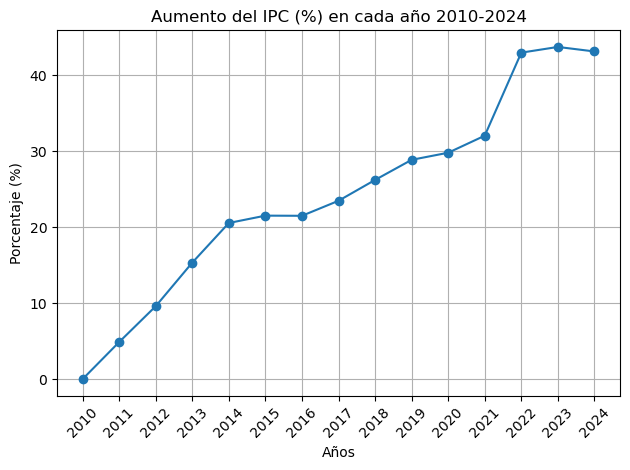

In [16]:
ipc_fixed["IPC_Change"] = [curr - 100 for curr in list(ipc_fixed["IPC"])]
ipc_fixed
plt.plot(ipc_fixed["Year"], ipc_fixed["IPC_Change"], "o-")
plt.grid()
plt.xticks(ipc_fixed["Year"], rotation=45)
plt.title("Aumento del IPC (%) en cada año 2010-2024")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Años")
plt.tight_layout()
plt.savefig("aumento_ipc_2010_2024")
plt.show()

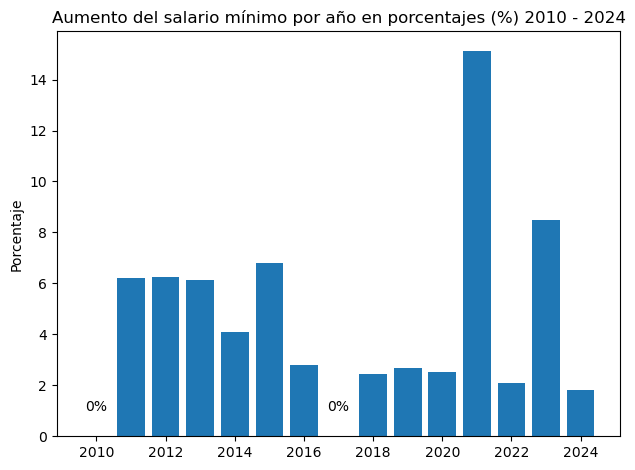

In [17]:
salarios = pd.read_excel(r"C:\Users\jaria\Desktop\salarios_minimo_2010_2024_crc.xlsx")
salarios["Amount"] = [int(salario.replace(".", "").split(",")[0]) for salario in salarios["Amount"]] 
salarios = salarios.sort_values(by="Year", ascending=True).reset_index()
salarios["Amount_Change"] = (salarios["Amount"].pct_change() * 100).fillna(0)
salarios 
plt.bar(salarios["Year"], salarios["Amount_Change"])
plt.title("Aumento del salario mínimo por año en porcentajes (%) 2010 - 2024")
plt.ylabel("Porcentaje")
plt.text(2017, 1, "0%", ha="center")
plt.text(2010, 1, "0%", ha="center")
plt.tight_layout()
plt.savefig("aumento_salario_minimo_porcentaje")

C:\Users\jaria\AppData\Local\Temp\ipykernel_18056\3374337386.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ipc_fixed["Year"], rotation=45)


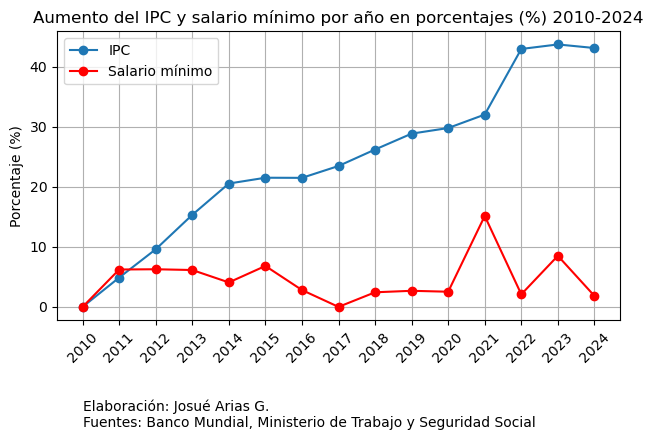

In [19]:
fig, ax = plt.subplots()
ax.plot(ipc_fixed["Year"], ipc_fixed["IPC_Change"], "o-", label="IPC")
ax.set_xticklabels(ipc_fixed["Year"], rotation=45)
ax.grid()
ax.set_title("Aumento del IPC y salario mínimo por año en porcentajes (%) 2010-2024")
ax.plot(ipc_fixed["Year"], salarios["Amount_Change"], "ro-", label="Salario mínimo")
ax.legend()
ax.text(0, -20, "Elaboración: Josué Arias G.\nFuentes: Banco Mundial, Ministerio de Trabajo y Seguridad Social")
plt.ylabel("Porcentaje (%)")
plt.tight_layout()

plt.savefig("ipc_salario_minimo_porcentajes_aumento_2010_2024")
plt.show()

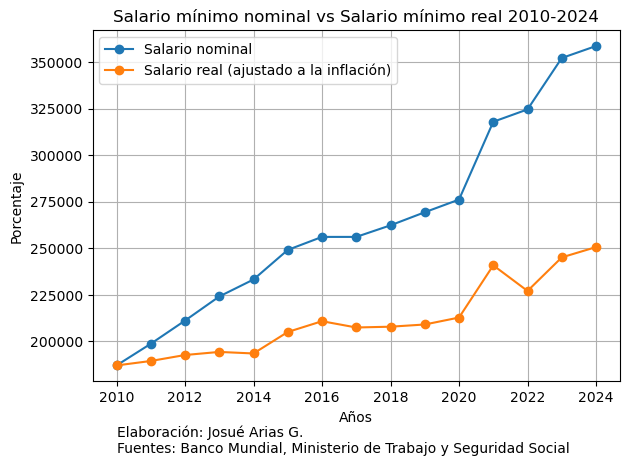

In [ ]:
salarios_nominales = list(salarios["Amount"])
ipc_a_base = list(ipc_fixed["IPC"])
data = []
for s, i in zip(salarios_nominales, ipc_a_base):
    data.append((s/i) * 100)
salarios_reales = pd.DataFrame({"Year": ipc_fixed["Year"], "Amount": data})
salarios_reales.to_excel("salarios_reales_2010_2024.xlsx")
plt.plot(salarios["Year"], salarios["Amount"], "o-", label="Salario nominal")
plt.plot(salarios["Year"],salarios_reales["Amount"], "o-", label="Salario real (ajustado a la inflación)")
plt.grid()
plt.legend()
plt.title("Salario mínimo nominal vs Salario mínimo real 2010-2024")
plt.text(x=2010, y=140000, s="Elaboración: Josué Arias G.\nFuentes: Banco Mundial, Ministerio de Trabajo y Seguridad Social")
plt.ylabel("Salario en colones")
plt.xlabel("Años")
plt.ylabel("Porcentaje")
plt.tight_layout()
plt.savefig("salario_nominal_vs_real_2010_2024")

In [22]:
salarios.to_excel("salarios_2010_2024.xlsx")
ipc_fixed.to_excel("ipc_2010_2024.xlsx")

In [23]:
ipc_fixed

,Year,IPC,IPC_Change
0,2010,100.000000,0.000000
1,2011,104.877998,4.877998
2,2012,109.592740,9.592740
3,2013,115.325904,15.325904
4,2014,120.537714,20.537714
5,2015,121.504404,21.504404
6,2016,121.483167,21.483167
7,2017,123.458370,23.458370
8,2018,126.200522,26.200522
9,2019,128.845743,28.845743
